<a href="https://colab.research.google.com/github/robitussin/CCDEPLRL_EXERCISES/blob/main/exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3

## Group Members

|  Fruit | Members  |   
|---|---|
| Calamansi | EJ Guevara, Eliezer Cruz |   
| Lemon | Shiela Mendoza, Clarence Robedillo, Alliyah Gomez, James Concepcion |   
| Grapes | Stephen Lee, Seth Mercado, Alexander Enriquez, Sherdon Esquejo |  
| Mango | Celestine Villanueva, Mariel Ollage, Clarence Conde, Marchuzs Cortez |  
| Carrot | Russel Castillo |  
| Strawberry | Christian Bongao, Stephen Jovillar, Ali Mohamedberhan |  


## Instructions


1. Each group will need to collect **100-200 images** of the fruit
2. Split the collected images for train, test and validation. Please make sure that there are no duplicate images. Images that are used in train should not appear in test, validation and vice versa.
3. Combine the collected images together with the images of apple, orange and banana. They  are already available in the link below: https://github.com/robitussin/tensorflow_lite_projects/tree/main/images/fruits
4. Create and train a Convolutional Neural Network (CNN).
5. Save the model as **"model.tflite"**
6. Create a folder named **exercise_3** in your **CCDEPLRL_EXERCISES_COM211_ML** repository.
7. Upload the **python notebook (.ipynb)** and the **model (.tflite)** in the exercise_3 folder

Note: Each member should upload the notebook and model in their own exercise repository.

Deadline of submission is on **May 9, 2024**

## Model

In [1]:
!wget https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
!unzip fruits.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


Import the libraries

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

Hyperparameters: Set the image size and batch size

In [4]:
img_height, img_width = 32, 32
batch_size = 20

Split the images into train, validation and test

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 460 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
Found 130 files belonging to 3 classes.


Display sample images from the dataset

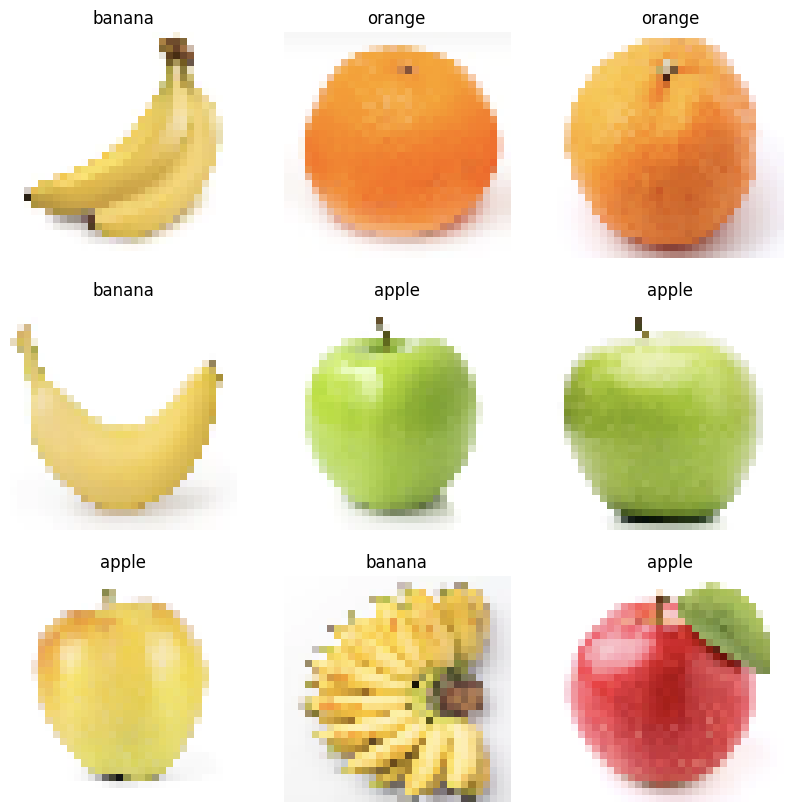

In [6]:
class_names = ["apple", "banana", "orange"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Create the Convolutional Neural Network Model (CNN)

In [7]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(3)
    ]
)


Define the optimizer and loss function

In [8]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

Train the model

In [9]:

model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.4302 - loss: 1.0785 - val_accuracy: 0.5152 - val_loss: 0.8691
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.7293 - loss: 0.6934 - val_accuracy: 0.6212 - val_loss: 0.6312
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8157 - loss: 0.4043 - val_accuracy: 0.7727 - val_loss: 0.3527
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9262 - loss: 0.2459 - val_accuracy: 0.9394 - val_loss: 0.1762
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8988 - loss: 0.2277 - val_accuracy: 0.8636 - val_loss: 0.3288
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9316 - loss: 0.1999 - val_accuracy: 0.9697 - val_loss: 0.1846
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8769 - loss: 0.2756 - val_accuracy: 0.9091 - val_loss: 0.1967
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9362 - loss: 0.1546 - val_accuracy: 0.9242 - v

Test the model

In [10]:
model.evaluate(test_ds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9403 - loss: 0.2282


[0.23368145525455475, 0.9461538195610046]

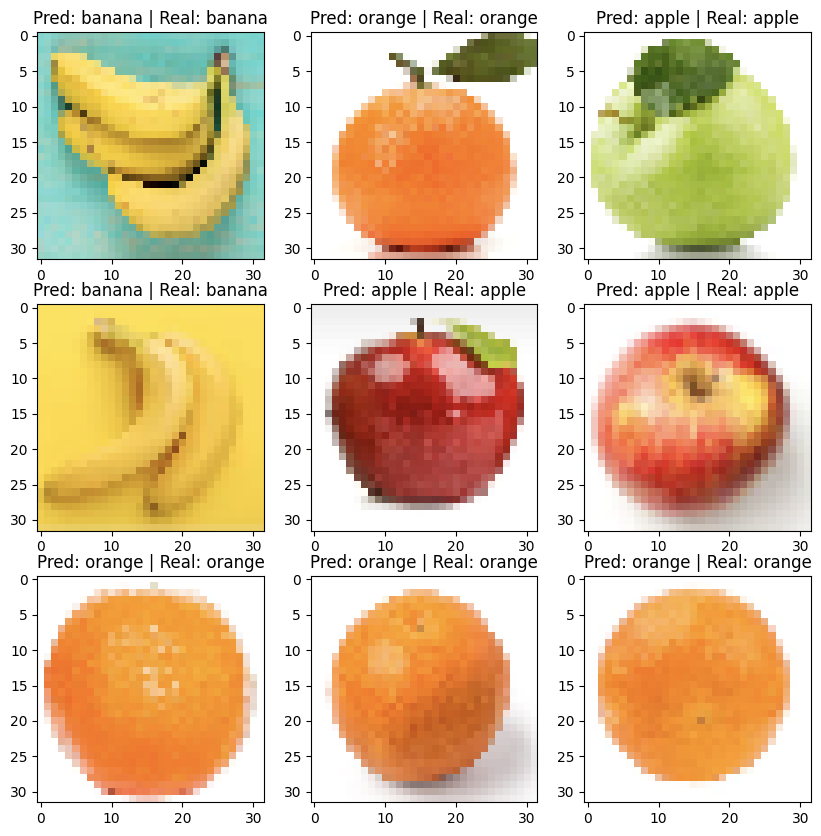

In [11]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

Save the model

In [12]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\herre\AppData\Local\Temp\tmp5uws4uii\assets


INFO:tensorflow:Assets written to: C:\Users\herre\AppData\Local\Temp\tmp5uws4uii\assets


: 